
<h1 id="1.-로지스틱-회귀">1. 로지스틱 회귀<a class="anchor-link" href="#1.-로지스틱-회귀">¶</a></h1><h4 id="1)-합격여부-데이터-읽기">1) 합격여부 데이터 읽기<a class="anchor-link" href="#1)-합격여부-데이터-읽기">¶</a></h4><h4 id="2)-그래프-그리기">2) 그래프 그리기<a class="anchor-link" href="#2)-그래프-그리기">¶</a></h4><h4 id="3)-학습">3) 학습<a class="anchor-link" href="#3)-학습">¶</a></h4><h4 id="4)-decision-boundary">4) decision boundary<a class="anchor-link" href="#4)-decision-boundary">¶</a></h4>



<h2 id="1)-합격여부-데이터-읽기">1) 합격여부 데이터 읽기<a class="anchor-link" href="#1)-합격여부-데이터-읽기">¶</a></h2>


In [3]:

import numpy as np

# (시험1점수),(시험2점수),(합격여부)
# Ng, Maxhine Learning, Coursera, m1-ex2 중
import pandas as pd
data = pd.read_csv('admit.txt', names=['ex1','ex2','Admitted'])
print(data)

X = np.c_[data['ex1'], data['ex2']] #점수
y = data['Admitted'] # 합격 여부(1: admitted, 0: not admitted)
m = len(data)     # 정보 개수(행 개수)



          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
5   45.083277  56.316372         0
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
10  95.861555  38.225278         0
11  75.013658  30.603263         0
12  82.307053  76.481963         1
13  69.364589  97.718692         1
14  39.538339  76.036811         0
15  53.971052  89.207350         1
16  69.070144  52.740470         1
17  67.946855  46.678574         0
18  70.661510  92.927138         1
19  76.978784  47.575964         1
20  67.372028  42.838438         0
21  89.676776  65.799366         1
22  50.534788  48.855812         0
23  34.212061  44.209529         0
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
27  93.114389  38.80

In [5]:

# numpy array 형태로 변환, 형태 변환(m) -> (m,1)
#X = (np.array(X)).reshape(m,2)
#y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)



(100, 2) (100,)



<h2 id="2)-그래프-그리기">2) 그래프 그리기<a class="anchor-link" href="#2)-그래프-그리기">¶</a></h2>


In [7]:

# 합격, 불합격 데이터 인덱스 찾기
pos=[]
neg=[]

for(i,val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)



[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


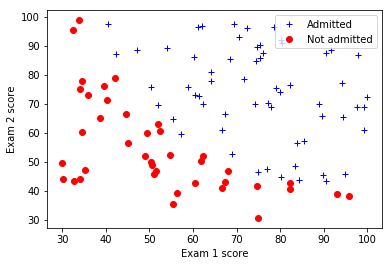

In [8]:

import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1), 'b+', label='Admitted') # X[:1].reshape(-1): 한 줄로 피기. (m,) ->(m)
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc='upper right')
plt.show()




<h2 id="3)-학습">3) 학습<a class="anchor-link" href="#3)-학습">¶</a></h2>


In [9]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', C=10) # c: 클수록 규제 줄어듦
log_reg.fit(X,y)



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:

# exam1 30 점, exam2 70 맞은 학생은 합격/불합격?
# exam1 50 점, exam2 90 점
log_reg.predict([[30,70],
                [50,90]])



array([0, 1], dtype=int64)


<h2 id="4)-decision-boundary">4) decision boundary<a class="anchor-link" href="#4)-decision-boundary">¶</a></h2>


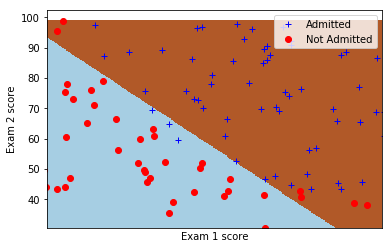

In [11]:

# Plot the decision booundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
h = .2 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Admitted')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not Admitted')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.xlim(yy.min(), yy.max())
plt.xticks(())
plt.xticks(())

plt.show()




<h1 id="2.-로지스틱-회귀-+-정규화">2. 로지스틱 회귀 + 정규화<a class="anchor-link" href="#2.-로지스틱-회귀-+-정규화">¶</a></h1><h4 id="1)-합격여부-데이터-읽기">1) 합격여부 데이터 읽기<a class="anchor-link" href="#1)-합격여부-데이터-읽기">¶</a></h4><h4 id="2)-그래프-그리기">2) 그래프 그리기<a class="anchor-link" href="#2)-그래프-그리기">¶</a></h4><h4 id="3)-학습">3) 학습<a class="anchor-link" href="#3)-학습">¶</a></h4><h4 id="4)-decision-boundary">4) decision boundary<a class="anchor-link" href="#4)-decision-boundary">¶</a></h4>



<h2 id="1)-불량여부-데이터-읽기">1) 불량여부 데이터 읽기<a class="anchor-link" href="#1)-불량여부-데이터-읽기">¶</a></h2>


In [13]:

import numpy as np

# (test1),(test2),(Quality Assurance 통과여부)
# Ng, Maxhine Learning, Coursera, m1-ex2 중
import pandas as pd
data = pd.read_csv('qa.txt', names=['t1','t2','Passed'])
print(data)

X = np.c_[data['t1'], data['t2']] #점수
y = data['Passed'] # 합격 여부(1: passed, 0: failed)
m = len(data)     # 정보 개수(행 개수)



           t1        t2  Passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
5   -0.524770  0.209800       1
6   -0.398040  0.034357       1
7   -0.305880 -0.192250       1
8    0.016705 -0.404240       1
9    0.131910 -0.513890       1
10   0.385370 -0.565060       1
11   0.529380 -0.521200       1
12   0.638820 -0.243420       1
13   0.736750 -0.184940       1
14   0.546660  0.487570       1
15   0.322000  0.582600       1
16   0.166470  0.538740       1
17  -0.046659  0.816520       1
18  -0.173390  0.699560       1
19  -0.478690  0.633770       1
20  -0.605410  0.597220       1
21  -0.628460  0.334060       1
22  -0.593890  0.005117       1
23  -0.421080 -0.272660       1
24  -0.115780 -0.396930       1
25   0.201040 -0.601610       1
26   0.466010 -0.535820       1
27   0.673390 -0.535820       1
28  -0.138820  0.546050       1
29  -0.294350  0.779970       1
..      

In [15]:

# numpy array 형태로 변환, 형태 변환(m) -> (m,1)
#X = (np.array(X)).reshape(m,2)
#y = (np.array(y)).reshape(m,1)
print(X.shape, y.shape)



(118, 2) (118,)



<h2 id="2)-그래프-그리기">2) 그래프 그리기<a class="anchor-link" href="#2)-그래프-그리기">¶</a></h2>


In [16]:

# passed, failed 데이터 인덱스 찾기
pos=[]
neg=[]

for(i,val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


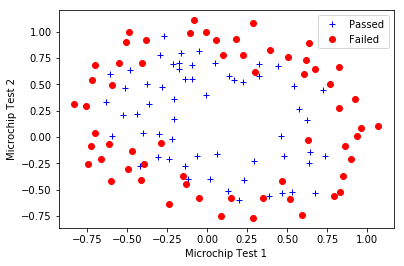

In [17]:

import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1), 'b+', label='Passed') 
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Failed')
plt.xlabel("Microchip Test 1") # Test1 수치
plt.ylabel("Microchip Test 2") # Test2 수치
plt.legend(loc='upper right')
plt.show()



In [19]:

#X_poly = mapFeature(X[:,0], X[:,1])
from sklearn.preprocessing import PolynomialFeatures
degree = 6
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0].shape)

[ 0.051267  0.69956 ]
(27,)


In [20]:

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=1e-1) # 1, 1e4(규제 조금), 1e-1(규제 많이)
log_reg.fit(X_poly, y)



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

C:\Users\soomanhong\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


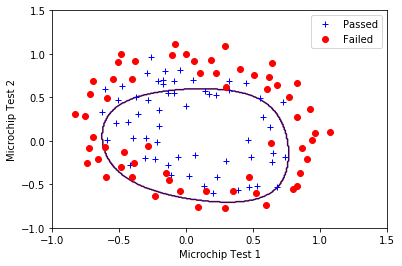

In [21]:

u = np.linspace(-1, 1.5, 300)
v = np.linspace(-1, 1.5, 300)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    a=[]
    for j in range(len(v)):
        a.append(np.array([u[i], v[j]]))
        
    my_data = poly_features.fit_transform( a )
    z[i] = log_reg.predict( my_data )
    
plt.contour(u,v,z,0)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Failed')
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc='upper right')
plt.show()




<h2 id="5)-로지스틱-회귀의-성능-측정법">5) 로지스틱 회귀의 성능 측정법<a class="anchor-link" href="#5)-로지스틱-회귀의-성능-측정법">¶</a></h2>


[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0]
[[46 14]
 [16 42]]


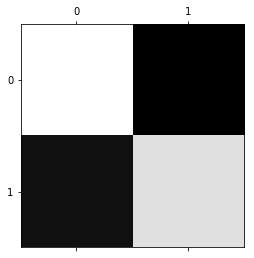

precision_score:  0.75
recall_score:  0.724137931034
F1_score:  0.736842105263


In [28]:

# 1. y 값 prediction
""" 편의상 train 데이터에 대해 prediction 함.
원래는 validation, test 데이터에 대해 해야 함"""
y_pred=log_reg.predict(X_poly)
print(y_pred)

# 2. confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

# 3. precision & recall
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y, y_pred)) # 46 / (46+14)
print("recall_score: ", recall_score(y, y_pred)) # 46 / (46+16)

# 4. F1 score
from sklearn.metrics import f1_score
print("F1_score: ", f1_score(y, y_pred))



In [30]:

# y probability
y_scores = log_reg.decision_function(X_poly)
print(y_scores)



[ 0.05721229  0.09031196  0.08026682  0.17053879  0.12428068  0.12804255
  0.15762518  0.13103297  0.10611841  0.05698076 -0.02303367 -0.08009722
 -0.08781319 -0.21166892 -0.03087887  0.07336408  0.15980733 -0.10426686
  0.07493999  0.06340612  0.01223171  0.06483144  0.05088184  0.06692669
  0.09972027  0.0039081  -0.04642661 -0.2288355   0.19104147 -0.04422837
 -0.48582731 -0.06976624  0.12417891  0.20140773  0.20043654  0.18558606
  0.14110412  0.17216763  0.17914447  0.08748364  0.12938355  0.05788662
 -0.07524136  0.10212642 -0.03704723  0.00922225 -0.25399059  0.14984191
 -0.08845407 -0.03267549  0.14628497  0.23248708  0.18795328  0.2312281
  0.22583701  0.16968366  0.19363608  0.13978443 -0.47339273 -0.11374384
  0.05569444 -0.27770043 -0.3643466  -0.1778768  -0.37102315 -0.73725405
 -0.39571626 -0.78450463 -0.69486198 -0.46788667 -0.5786725  -0.48962111
 -0.49382144 -0.4376614  -0.27751262 -0.10992105  0.0029229  -0.01829043
 -0.13858015 -0.09891484  0.02217236  0.07687025  0.

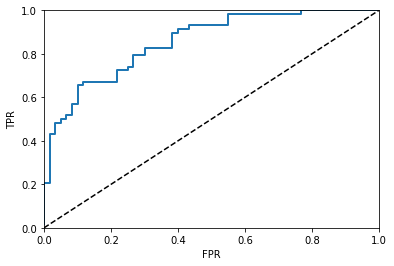

roc_auc_score:  0.855459770115


In [32]:

# ROC curve
from sklearn.metrics import  roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

# 6. AUC
from sklearn.metrics import roc_auc_score
print("roc_auc_score: ", roc_auc_score(y, y_scores))
